**Multiple Linear Regression**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
from IPython.display import Image
import itertools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Data-inspection" data-toc-modified-id="Data-inspection-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data inspection</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Handle missing values</a></span></li><li><span><a href="#Transform-data" data-toc-modified-id="Transform-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transform data</a></span></li><li><span><a href="#Visualize-data" data-toc-modified-id="Visualize-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualize data</a></span></li></ul></li><li><span><a href="#Problem-Set" data-toc-modified-id="Problem-Set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Set</a></span><ul class="toc-item"><li><span><a href="#Task-(a)-Scatterplot" data-toc-modified-id="Task-(a)-Scatterplot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Task (a) Scatterplot</a></span></li><li><span><a href="#Task-(b)-Correlations" data-toc-modified-id="Task-(b)-Correlations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Task (b) Correlations</a></span></li><li><span><a href="#Task-(c)-Regression-model" data-toc-modified-id="Task-(c)-Regression-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Task (c) Regression model</a></span><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Multiple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Relationship" data-toc-modified-id="Relationship-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Relationship</a></span></li><li><span><a href="#Significance" data-toc-modified-id="Significance-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Significance</a></span></li><li><span><a href="#Coefficients" data-toc-modified-id="Coefficients-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>Coefficients</a></span></li></ul></li></ul></li><li><span><a href="#Task-(d)-Diagnostic-plots" data-toc-modified-id="Task-(d)-Diagnostic-plots-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Task (d) Diagnostic plots</a></span><ul class="toc-item"><li><span><a href="#Residuals-vs-fitted-plot" data-toc-modified-id="Residuals-vs-fitted-plot-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Residuals vs fitted plot</a></span></li><li><span><a href="#Normal-Q-Q" data-toc-modified-id="Normal-Q-Q-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Normal Q-Q</a></span></li><li><span><a href="#Scale-Location-plot" data-toc-modified-id="Scale-Location-plot-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Scale-Location plot</a></span></li><li><span><a href="#Residuals-vs-leverage-plot" data-toc-modified-id="Residuals-vs-leverage-plot-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Residuals vs leverage plot</a></span></li></ul></li><li><span><a href="#Task-(e)--Interaction-effects" data-toc-modified-id="Task-(e)--Interaction-effects-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Task (e)  Interaction effects</a></span></li><li><span><a href="#Task-(f)--Transformations" data-toc-modified-id="Task-(f)--Transformations-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Task (f)  Transformations</a></span></li></ul></li></ul></div>

# Problem Set: Multiple Linear regression

This question involves the use of multiple linear regression on the Auto data set.

In section 1, we prepare the data. Section 2 deals with the problem set:

- 2.1 (a) Produce a scatterplot matrix which includes all of the variables in the data set. Let's assume we want to predict the variable `mpg`as a dependent variable in a regression model. According to the scatterplot, which variables would you include in the model? Explain your answer.


- 2.2 (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative. Use the result to explain which variabels you would include in a model to predict `mpg`?


- 2.3 (c) Use the `statsmodel ols` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
   1. Is there a relationship between the predictors and the response?
   2. Which predictors appear to have a statistically significant relationship to the response?
   3. What does the coefficient for the year variable suggest?
   
   
- 2.4 (d) Use some diagnostic plots (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?


- 2.5 (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant? Use the 

   - adjusted R-squared, 
   - mean squared error of residuals (MSE), 
   - the F-Statistic, 
   - the Bayesian Information Criterion (BIC) and
   - Akaike's Information criterion (AIC) 
   
   to comment on your findings. 
   
   
- 2.6 (f) Try different transformations of the X variable 'horsepower', such as log(X), sqrt(x) and $X^2$ and compare the fit with the simple model without transformation. Use the adjusted R-squared, the F-Statistic,mean squared error of residuals (MSE), the Bayesian Information Criterion (BIC) and Akaike's Information criterion (AIC) to comment on your findings. 
     
  Hint: given a predictor `X`, we can create a predictor $X^2$ using $I(X**2)$. The function I() is needed since some symbols have a special meaning in a formula. Furthermore, you can use np.sqrt(X) and np.log(X).

---

## Data preparation

### Import data

In [2]:
# Load the csv data files into pandas dataframes
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Auto.csv")

### Data inspection

First of all, let's take a look at the variables (columns) in the data set.

In [3]:
# show all variables in the data set
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [4]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["name"])

397

In [6]:
# check for duplicates and print results (if the two numbers match, we have no duplicates)
# show the lenght of the variable id (i.e. the number of observations)
print(f'IDs: {len(df["name"])}')
# count the number of individual id's
print(f'Unique IDs: {len(df["name"].value_counts())}')

IDs: 397
Unique IDs: 304


It is not possible to easily check for duplicates since it is plausible that there are multiple car types of the same name...

In [7]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [8]:
# change data type
df['origin'] = pd.Categorical(df['origin'])
df['name'] = pd.Categorical(df['name'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # solution

### Handle missing values

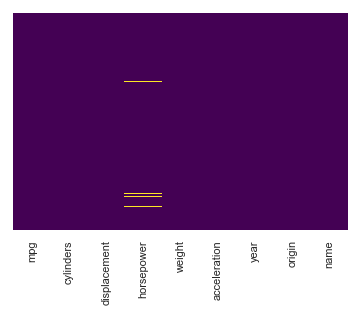

In [9]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

We can also check the column-wise distribution of null values:

In [10]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [11]:
df = df.dropna()

In [12]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


### Transform data

In [13]:
# summary statistics for all numerical columns
round(df.describe(),2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [14]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,origin,name
count,392,392
unique,3,301
top,1,ford pinto
freq,245,5


### Visualize data

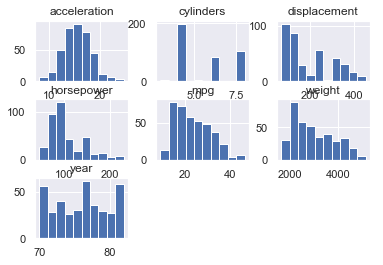

In [15]:
df.hist();

## Problem Set

### Task (a) Scatterplot

Produce a scatterplot matrix which includes all of the variables in the data set.

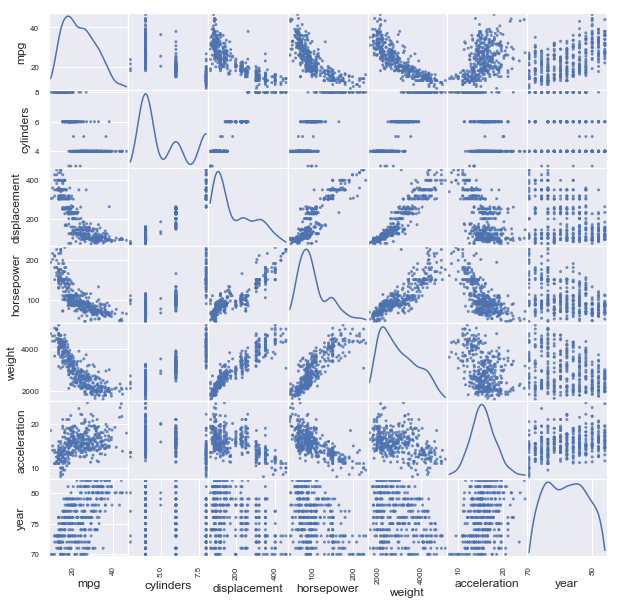

In [16]:
# plot all variables in a scatter matrix
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='kde');

Explanation:
    
|

|

|

|

|

|

|

|

|

|

|

### Task (b) Correlations

Compute the matrix of correlations between the variables using the function cor(). You will need to exclude
the name variable, which is qualitative.

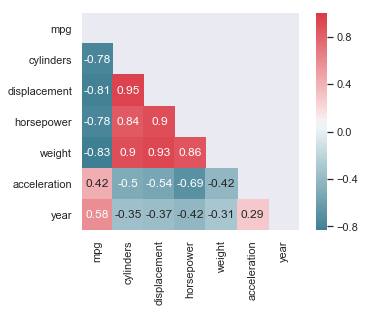

In [17]:
# Inspect relationship between variables with correlation
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

In [18]:
# Plot correlations as table
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


Explanation:
    
|

|

|

|

|

|

|

|

|

|

|

### Task (c) Regression model

Use the statsmodel ols function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. 

#### Multiple Linear Regression

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [20]:
# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm_all = smf.ols(formula ='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
                 data=df).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          1.79e-139
Time:                        18:06:55   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.2]      2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.3]      2.8532      0.553      5.162      0.000       1.766       3.940
cylinders       -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement     0.0240      0.008      3.133      0.002       0.009       0.039
horsepower      -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight          -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration     0.0791      0.098      0.805      0.421      -0.114       0.272
year             0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Comment on the output. 

##### Relationship 

- Is there a relationship between the predictors and the response?

|

|

|

|

|


##### Significance

- 2. Which predictors appear to have a statistically significant relationship to the response?

|

|

|

|

|



##### Coefficients

- 3. What does the coefficient for the year variable suggest?

|

|

|

|

|




### Task (d) Diagnostic plots

Use diagnostic plots (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit. Comment on any problems you see with the fit. 

#### Residuals vs fitted plot

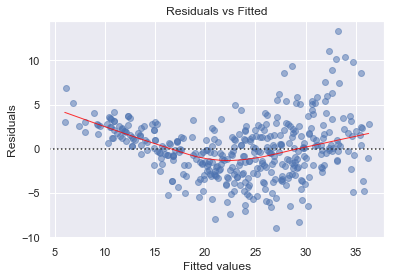

In [21]:
# fitted values
model_fitted_y = lm_all.fittedvalues;
# Basic plot
plot = sns.residplot(model_fitted_y, 'mpg', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 
                               'lw': 1, 'alpha': 0.8});

plot.set_title('Residuals vs Fitted');
plot.set_xlabel('Fitted values');
plot.set_ylabel('Residuals');

Interpretation

|

|

|

|

|



#### Normal Q-Q

This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

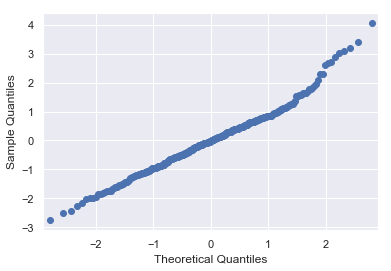

In [22]:
# Use standardized residuals
sm.qqplot(lm_all.get_influence().resid_studentized_internal);

Interpretation

|

|

|

|

|

#### Scale-Location plot

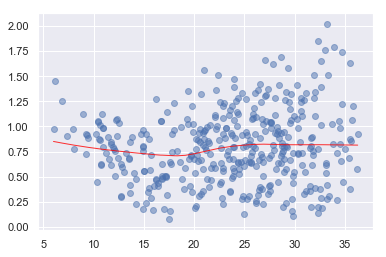

In [23]:
# Scale Location plot
plt.scatter(lm_all.fittedvalues, np.sqrt(np.abs(lm_all.get_influence().resid_studentized_internal)), alpha=0.5)
sns.regplot(lm_all.fittedvalues, np.sqrt(np.abs(lm_all.get_influence().resid_studentized_internal)), 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

Interpretation

|

|

|

|

|

#### Residuals vs leverage plot

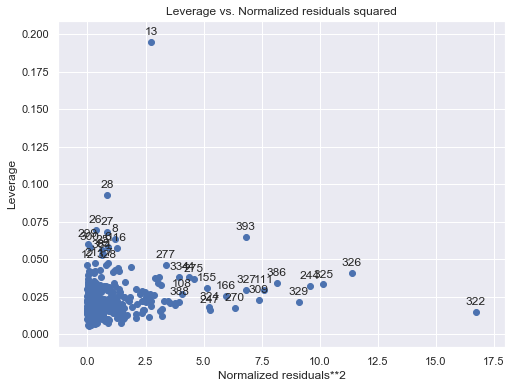

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm_all, ax = ax)

Interpretation

|

|

|

|

|

### Task (e)  Interaction effects

Use the * and : symbols to fit linear regression models with **interaction effects**. Do any interactions appear to be statistically significant?

**Explanation of interaction effects:**

  - The syntax var1:var2 tells Python to include an interaction term between var1 and var2. 

  - The syntax $var1*var2$ simultaneously includes var1, var2 *and* the interaction term var1×var2 as predictors; it is a shorthand for
var1 + var2 + var1:var2.

Possible strategy: use the preditors with the highest correlation (here, I only use two the highest values).

In [25]:
# Fit the model with interaction effect *
lm_int = smf.ols(formula = 'mpg ~ cylinders*displacement + displacement*weight', data=df).fit()
lm_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     205.8
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          1.63e-106
Time:                        18:06:56   Log-Likelihood:                -1106.6
No. Observations:                 392   AIC:                             2225.
Df Residuals:                     386   BIC:                             2249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 52.6234      2.237     23.519      0.000      48.224      57.023
cylinders                  0.7606      0.767      0.992      0.322      -0.747       2.269
displacement              -0.0735      0.017     -4.403      0.000      -0.106      -0.041
cylinders:displacement    -0.0030      0.003     -0.872      0.384      -0.010       0.004
weight                    -0.0099      0.001     -7.438      0.000      -0.013      -0.007
displacement:weight     2.128e-05      5e-06      4.254      0.000    1.14e-05    3.11e-05
==============================================================================
Omnibus:                       57.314   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.792
Skew:                           0.814   Prob(JB):                     8.75e-25
Kurtosis:                       5.033   Cond. No.                     9.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To see the difference between * and :, compare the predictors in the summary with the next model:

In [26]:
# Fit the model with interaction effect :
lm_int = smf.ols(formula = 'mpg ~ cylinders:displacement + displacement:weight', data=df).fit()
lm_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.94e-84
Time:                        18:06:56   Log-Likelihood:                -1166.9
No. Observations:                 392   AIC:                             2340.
Df Residuals:                     389   BIC:                             2352.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31.2575      0.388     80.472      0.000      30.494      32.021
cylinders:displacement    -0.0007      0.001     -0.560      0.576      -0.003       0.002
displacement:weight    -1.041e-05   2.55e-06     -4.090      0.000   -1.54e-05   -5.41e-06
==============================================================================
Omnibus:                       39.853   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.066
Skew:                           0.768   Prob(JB):                     8.15e-12
Kurtosis:                       3.876   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

|

|

|

|

|

|

|

**Strategy 2: test all possible combinations and select significant results.**

In [27]:
# Funtion to print results of interaction
def test_interaction(df, variables):
    lm_temp = smf.ols(formula='mpg ~ ' + variables , data=df).fit()
    print(f'{variables:<30} coeff: {lm_temp.params[1:].values[-1]:.5f} \t pvalue: {lm_temp.pvalues[0]:.7f}')

# Create all possible iterations
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
combinations = list(itertools.combinations(variables, 2))

print('Combinations [var1 : var2] :')
for i in combinations:
    test_interaction(df, i[0]+':'+i[1])
    
print('\nCombinations [var1 * var2] :')
for i in combinations:
    test_interaction(df, i[0]+'*'+i[1])

Combinations [var1 : var2] :
cylinders:displacement         coeff: -0.00612 	 pvalue: 0.0000000
cylinders:horsepower           coeff: -0.01444 	 pvalue: 0.0000000
cylinders:weight               coeff: -0.00062 	 pvalue: 0.0000000
cylinders:acceleration         coeff: -0.21146 	 pvalue: 0.0000000
cylinders:year                 coeff: -0.04602 	 pvalue: 0.0000000
cylinders:origin               coeff: -2.29861 	 pvalue: 0.0000000
displacement:horsepower        coeff: -0.00027 	 pvalue: 0.0000000
displacement:weight            coeff: -0.00001 	 pvalue: 0.0000000
displacement:acceleration      coeff: -0.00471 	 pvalue: 0.0000000
displacement:year              coeff: -0.00081 	 pvalue: 0.0000000
displacement:origin            coeff: -0.04564 	 pvalue: 0.0000000
horsepower:weight              coeff: -0.00003 	 pvalue: 0.0000000
horsepower:acceleration        coeff: -0.01566 	 pvalue: 0.0000000
horsepower:year                coeff: -0.00216 	 pvalue: 0.0000000
horsepower:origin              co

Interpretation:

|

|

|

|

|

|

|

### Task (f)  Transformations

- Try different transformations of the X variable 'horsepower', such as log(X), sqrt(x) and $X^2$ and compare the fit with the simple model without transformation. Use the adjusted R-squared, the F-Statistic,mean squared error of residuals (MSE), the Bayesian Information Criterion (BIC) and Akaike's Information criterion (AIC) to comment on your findings. 

Hint: given a predictor X, we can create a predictor $X^2$ using $I(X**2)$. The function I() is needed since somy symbols have a special meaning in a formula. Furthermore, you can use np.sqrt(X) and np.log(X).

In [28]:
# For reference, print the simple model again:
lm = smf.ols(formula='mpg ~ horsepower', data=df).fit()
display(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           7.03e-81
Time:                        18:06:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# log(X):
lm_log = smf.ols(formula='mpg ~ np.log(horsepower)', data=df).fit()
display(lm_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.70e-95
Time:                        18:06:57   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3.050     35.644      0.000     102.704     114.695
np.log(horsepower)   -18.5822      0.663    -28.034      0.000     -19.885     -17.279
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.557
Skew:                           0.278   Prob(JB):                     0.000419
Kurtosis:                       3.803   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# X²:
lm_sqr = smf.ols(formula='mpg ~ I(horsepower**2)', data=df).fit()
display(lm_sqr.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           6.23e-62
Time:                        18:06:57   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.4658      0.447     68.219      0.000      29.588      31.344
I(horsepower ** 2)    -0.0006   2.83e-05    -20.042      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       25.973   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.455
Skew:                           0.666   Prob(JB):                     4.02e-07
Kurtosis:                       3.177   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# sqrt(X):
lm_sqrt = smf.ols(formula='mpg ~ np.sqrt(horsepower)', data=df).fit()
display(lm_sqrt.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.02e-89
Time:                        18:06:57   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052      1.349     43.516      0.000      56.053      61.358
np.sqrt(horsepower)    -3.5035      0.132    -26.544      0.000      -3.763      -3.244
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.121
Skew:                           0.384   Prob(JB):                      0.00142
Kurtosis:                       3.463   Cond. No.                         59.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print('Adj. R-squared of simple model:', lm.rsquared_adj )
print('Adj. R-squared of of log model:', lm_log.rsquared_adj )
print('Adj. R-squared of sqrt model', lm_sqrt.rsquared_adj )
print('-'*50)
print('F-statistic of simple model:', lm.fvalue)
print('F-statistic of of log model:', lm_log.fvalue)
print('F-statistic of sqrt model', lm_sqrt.fvalue)
print('-'*50)
print('MSE of residuals of simple model:', lm.mse_resid)
print('MSE of residuals of log model:', lm_log.mse_resid)
print('MSE of sqrt model', lm_sqrt.mse_resid)
print('-'*50)
print('BIC of residuals of simple model:', lm.bic)
print('BIC of residuals of log model:', lm_log.bic)
print('BIC of sqrt model', lm_sqrt.bic)
print('-'*50)
print('AIC of residuals of simple model:', lm.aic)
print('AIC of residuals of log model:', lm_log.aic)
print('AIC of sqrt model', lm_sqrt.aic)

Adj. R-squared of simple model: 0.6049378688071001
Adj. R-squared of of log model: 0.6674843404374681
Adj. R-squared of sqrt model 0.6427900027149314
--------------------------------------------------
F-statistic of simple model: 599.7177409015787
F-statistic of of log model: 785.8844696650133
F-statistic of sqrt model 704.5942246066687
--------------------------------------------------
MSE of residuals of simple model: 24.06645095367287
MSE of residuals of log model: 20.256236121711282
MSE of sqrt model 21.760569290365908
--------------------------------------------------
BIC of residuals of simple model: 2369.2661815169827
BIC of residuals of log model: 2301.702593737042
BIC of sqrt model 2329.7842511342164
--------------------------------------------------
AIC of residuals of simple model: 2361.3236578374017
AIC of residuals of log model: 2293.7600700574612
AIC of sqrt model 2321.8417274546355


**Comments on findings:**


|

|

|

|

|

|

|

---
---